<a href="https://colab.research.google.com/github/nathaliatgm1995/ds-projects-portfolio/blob/main/quick_projects/supervised_learning/boston_housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
uploaded = files.upload()

#boston = pd.read_csv('boston.csv')
#print(boston.head())

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
boston = pd.read_csv('boston.csv')
print(boston.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


In [ ]:
X = boston.drop('medv', axis = 1).values
y = boston['medv'].values

In [ ]:
X_rooms = X[:,6]
type(X_rooms),type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

In [ ]:
y.shape

(506, 1)

In [ ]:
X_rooms.shape


(506, 1)

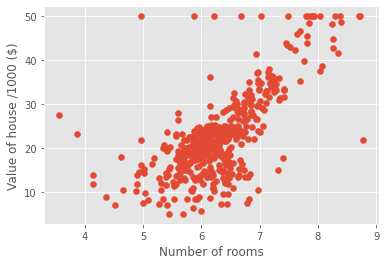

In [ ]:
#plotting house value as a function of number of rooms

plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)

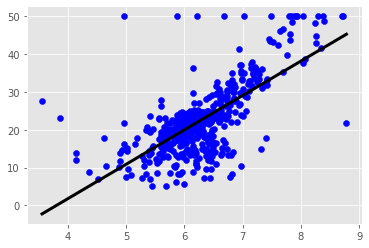

In [ ]:
plt.scatter(X_rooms, y, color = 'blue')
plt.plot(prediction_space, reg.predict(prediction_space), color = 'black', linewidth = 3)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test) 

In [ ]:
reg_all.score(X_test,y_test)

0.705160980890345

In [ ]:
#Cross-validation in scikit-learn

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv = 5)
print(cv_results)

[ 0.57280576  0.72459569  0.59122862  0.08126754 -0.20963498]


In [ ]:
np.mean(cv_results)

0.3520525256628691

In [ ]:
#Ridge regression in scikit-learn

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


0.6977072273529515

In [ ]:
#Lasso regression in scikit-learn

from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


0.5950229653464187

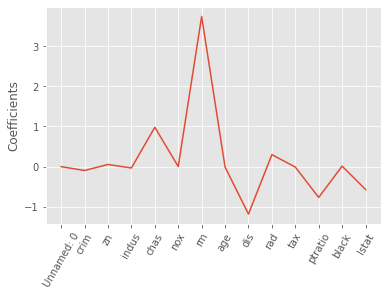

In [ ]:
#Lasso for feature selection in scikit-learn

names = boston.drop('medv', axis = 1).columns
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.plot(range(len(names)),lasso_coef)
plt.xticks(range(len(names)), names, rotation = 60)
plt.ylabel('Coefficients')
plt.show()